# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
0.0
0.0
0.0
0.0
0.0
-0.002
-0.003
-0.003
-0.003
0.0
0.0
-0.002
-0.002
-0.002
0.989
0.991
0.993
0.993
0.991
1.986
1.988
1.989
1.988
1.989
2.981
2.984
2.985
2.985
2.985
3.959
3.961
3.963
3.962
3.962
4.936
4.938
4.94
4.939
4.939
4.939
5.919
5.919
5.918
5.918
6.889
6.891
6.892
6.892
6.893
7.862
7.864
7.866
7.865
7.865
8.833
8.838
8.838
8.836
8.837
9.807
9.808
9.811
9.81
9.81
9.811
10.785
10.785
10.783
10.784
11.751
11.752
11.756
11.754
11.754
12.724
12.729
12.729
12.729
12.728
13.698
13.702
13.702
13.701
13.7
14.355
14.359
14.358
14.358
14.358
15.01
15.015
15.015
15.013
15.014
15.983
15.986
15.986
15.986
15.987
16.955
16.959
16.959
16.958
16.96
17.927
17.931
17.931
17.93
17.932
18.928
18.931
18.931
18.93
18.932
19.925
19.93
19.93
19.929
19.93
20.928
20.928
20.927
21.496
21.498
21.498
21.498
22.067
22.067
22.065
22.065
23.069
23.069
23.067
23.067
24.066
24.066
24.064
24.064
25.064
25.064
25.063
25.062
26.066
26.065
26.064
26.063

56.702
56.895
56.895
56.895
56.895
56.895
56.895
56.895
56.895
56.919
56.919
56.919
56.919
56.92
56.92
56.919
56.919
56.919
56.919
56.919
56.918
56.918
56.917
56.917
56.917
56.917
56.917
56.916
56.916
56.916
56.916
56.916
56.916
56.915
56.915
56.915
56.915
56.915
56.915
56.914
56.914
56.914
56.914
56.914
56.914
56.914
56.914
56.914
56.914
56.914
56.913
56.913
57.144
57.144
57.144
57.144
57.144
57.144
57.144
57.173
57.173
57.173
57.173
57.173
57.173
57.172
57.173
57.172
57.172
57.172
57.172
57.172
57.171
57.171
57.171
57.171
57.171
57.17
57.17
57.17
57.17
57.17
57.169
57.169
57.169
57.169
57.168
57.168
57.168
57.168
57.168
57.168
57.168
57.169
57.169
57.169
57.169
57.169
57.169
57.169
57.168
57.167
57.166
57.372
57.377
57.383
57.385
57.385
57.375
57.403
57.403
57.403
57.403
57.404
57.404
57.404
57.404
57.403
57.403
57.405
57.401
57.4
57.402
57.401
57.404
57.402
57.398
57.4
57.658
57.658
57.663
57.663
57.663
57.666
57.665
57.66
57.661
57.962
57.962
57.962
57.959
57.962
57.96
57.96
57.96


KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1397,2794,59.430
1398,2796,59.431
1399,2798,59.431
1400,2800,59.431


<IPython.core.display.Javascript object>


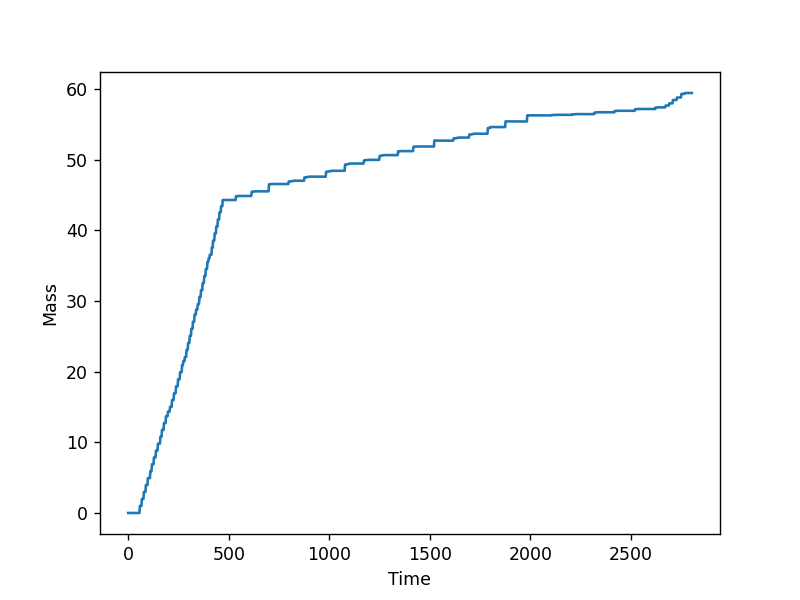

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_100723_S625-630.csv')